In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import os

# 1. Find correlation between FWI and fire intensity

In [70]:
save_path = '../../climada_petals/data/wildfire/output/'
merged_gdf = gpd.read_file(os.path.join(save_path, 'merged_gdf'))
# The distance does not consider the curvature of the Earth and is in degree not km
# Ex. distance of the first row is calculated by 
# np.sqrt((merged_gdf['latitude_left'][0] - merged_gdf['latitude_right'][0])**2 + (merged_gdf['longitude_left'][0] - merged_gdf['longitude_right'][0])**2)
merged_gdf


,latitude_left,longitude_left,brightness,satellite,instrument,confidence,bright_t31,frp,daynight,values,surface,latitude_right,longitude_right,fwi,distance,date,geometry
0,58.4495,-0.2430,315.1,Terra,MODIS,63,280.1,29.1,D,41204,0.0,58.313789,0.000000,NaN,0.278328,2000-11-02,POINT (-0.24300 58.44950)
1,58.1699,-1.3867,309.1,Terra,MODIS,64,274.9,25.3,N,41924,0.0,58.032759,0.000000,NaN,1.393465,2000-11-03,POINT (-1.38670 58.16990)
2,57.0274,1.9606,313.3,Terra,MODIS,57,278.1,28.3,D,44808,0.0,56.908638,2.000000,NaN,0.125127,2000-11-04,POINT (1.96060 57.02740)
3,58.1740,-1.3698,316.7,Terra,MODIS,63,281.2,21.2,D,41204,0.0,58.313789,0.000000,NaN,1.376914,2000-11-04,POINT (-1.36980 58.17400)
4,51.5788,-2.9113,300.9,Terra,MODIS,43,283.9,9.5,D,59609,0.0,51.569065,0.000000,0.351562,2.911316,2000-11-04,POINT (-2.91130 51.57880)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21241,49.4819,0.2440,300.2,Aqua,MODIS,19,267.3,23.1,N,65658,0.0,49.601853,0.416667,0.023438,0.210244,2023-01-18,POINT (0.24400 49.48190)
21242,51.5660,-3.7676,302.2,Terra,MODIS,39,277.5,9.6,D,59609,0.0,51.569065,0.000000,0.138672,3.767601,2023-01-19,POINT (-3.76760 51.56600)
21243,53.5733,-0.5941,300.3,Aqua,MODIS,25,272.1,9.9,N,53925,0.0,53.536276,0.000000,0.984375,0.595253,2023-01-20,POINT (-0.59410 53.57330)
21244,51.5744,-3.7765,300.5,Terra,MODIS,28,274.8,7.4,D,59609,0.0,51.569065,0.000000,0.261719,3.776504,2023-01-26,POINT (-3.77650 51.57440)


In [3]:
print(merged_gdf.shape)

(21246, 17)


In [71]:
from geopy.distance import great_circle

# Define a function to calculate the distance
def calculate_distance(row):
    coords_1 = (row['latitude_left'], row['longitude_left'])
    coords_2 = (row['latitude_right'], row['longitude_right'])
    return great_circle(coords_1, coords_2).kilometers

# Apply the function to each row in the GeoDataFrame and create a new column 'distance_km'
merged_gdf['distance_km'] = merged_gdf.apply(calculate_distance, axis=1)
merged_gdf


,latitude_left,longitude_left,brightness,satellite,instrument,confidence,bright_t31,frp,daynight,values,surface,latitude_right,longitude_right,fwi,distance,date,geometry,distance_km
0,58.4495,-0.2430,315.1,Terra,MODIS,63,280.1,29.1,D,41204,0.0,58.313789,0.000000,NaN,0.278328,2000-11-02,POINT (-0.24300 58.44950),20.697474
1,58.1699,-1.3867,309.1,Terra,MODIS,64,274.9,25.3,N,41924,0.0,58.032759,0.000000,NaN,1.393465,2000-11-03,POINT (-1.38670 58.16990),82.892263
2,57.0274,1.9606,313.3,Terra,MODIS,57,278.1,28.3,D,44808,0.0,56.908638,2.000000,NaN,0.125127,2000-11-04,POINT (1.96060 57.02740),13.419919
3,58.1740,-1.3698,316.7,Terra,MODIS,63,281.2,21.2,D,41204,0.0,58.313789,0.000000,NaN,1.376914,2000-11-04,POINT (-1.36980 58.17400),81.655637
4,51.5788,-2.9113,300.9,Terra,MODIS,43,283.9,9.5,D,59609,0.0,51.569065,0.000000,0.351562,2.911316,2000-11-04,POINT (-2.91130 51.57880),201.184386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21241,49.4819,0.2440,300.2,Aqua,MODIS,19,267.3,23.1,N,65658,0.0,49.601853,0.416667,0.023438,0.210244,2023-01-18,POINT (0.24400 49.48190),18.251621
21242,51.5660,-3.7676,302.2,Terra,MODIS,39,277.5,9.6,D,59609,0.0,51.569065,0.000000,0.138672,3.767601,2023-01-19,POINT (-3.76760 51.56600),260.380216
21243,53.5733,-0.5941,300.3,Aqua,MODIS,25,272.1,9.9,N,53925,0.0,53.536276,0.000000,0.984375,0.595253,2023-01-20,POINT (-0.59410 53.57330),39.459022
21244,51.5744,-3.7765,300.5,Terra,MODIS,28,274.8,7.4,D,59609,0.0,51.569065,0.000000,0.261719,3.776504,2023-01-26,POINT (-3.77650 51.57440),260.971498


In [72]:
merged_gdf['distance_km'].describe()

count    21246.000000
mean       203.960998
std        170.153159
min          0.070972
25%         40.119664
50%        187.819668
75%        267.185311
max        683.820921
Name: distance_km, dtype: float64

In [73]:
merged_gdf['confidence'].describe()

count    21246.000000
mean        56.297891
std         23.586382
min          0.000000
25%         43.000000
50%         58.000000
75%         72.000000
max        100.000000
Name: confidence, dtype: float64

## 1.1 Data Cleaning

In [133]:
# Drop FWI and brightness rows with missing values
filtered_df = merged_gdf.dropna(subset=['fwi', 'brightness'])
# Drop rows with distance_km > 31 km
filtered_df = filtered_df[filtered_df['distance_km'] <= 62]
# Drop rows with confidence < 30
filtered_df = filtered_df[filtered_df['confidence'] >= 30]

filtered_df

,latitude_left,longitude_left,brightness,satellite,instrument,confidence,bright_t31,frp,daynight,values,surface,latitude_right,longitude_right,fwi,distance,date,geometry,distance_km
5,53.5644,-0.5972,305.5,Terra,MODIS,58,279.2,10.2,D,53925,0.0,53.536276,0.000000,0.417969,0.597862,2000-11-10,POINT (-0.59720 53.56440),39.576341
27,53.5667,-0.5950,300.9,Terra,MODIS,40,279.1,7.5,D,53925,0.0,53.536276,0.000000,0.457031,0.595777,2000-12-03,POINT (-0.59500 53.56670),39.451502
34,53.5689,-0.6024,302.7,Terra,MODIS,43,267.3,15.3,N,53925,0.0,53.536276,0.000000,0.476562,0.603283,2000-12-30,POINT (-0.60240 53.56890),39.959005
37,53.5666,-0.5954,310.2,Aqua,MODIS,79,271.2,15.6,N,53925,0.0,53.536276,0.000000,0.367188,0.596172,2011-01-10,POINT (-0.59540 53.56660),39.476924
38,53.5666,-0.5954,310.2,Aqua,MODIS,79,271.2,15.6,N,53925,0.0,53.536276,0.000000,0.367188,0.596172,2011-01-10,POINT (-0.59540 53.56660),39.476924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21217,53.5669,-0.5977,302.5,Aqua,MODIS,46,288.4,7.0,D,53925,0.0,53.536276,0.000000,0.437500,0.598484,2022-10-28,POINT (-0.59770 53.56690),39.631023
21218,53.5666,-0.6050,304.0,Aqua,MODIS,54,284.1,10.1,D,53925,0.0,53.536276,0.000000,0.253906,0.605759,2022-11-04,POINT (-0.60500 53.56660),40.108824
21219,49.4701,0.5477,300.9,Terra,MODIS,35,279.4,19.9,N,65658,0.0,49.601853,0.416667,0.101562,0.185819,2022-11-04,POINT (0.54770 49.47010),17.436755
21223,53.5670,-0.5965,302.5,Terra,MODIS,50,283.6,7.5,D,53925,0.0,53.536276,0.000000,2.148438,0.597291,2022-11-08,POINT (-0.59650 53.56700),39.552957


## 1.2 Calculate Pearson correlation coefficient without normalization

In [134]:
# calculate pearson correlation coefficient
correlation = filtered_df['fwi'].corr(filtered_df['bright_t31'])
print(f"The correlation between FWI and brightness is: {correlation}")

correlation = filtered_df['fwi'].corr(filtered_df[['brightness', 'bright_t31']].mean(axis=1))
print(f"The correlation between FWI and brightness is: {correlation}")

The correlation between FWI and brightness is: 0.4578669269151292
The correlation between FWI and brightness is: 0.43027942794099955


In [51]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
filtered_df[['fwi', 'bright_t31']].corr(method=histogram_intersection)

,fwi,brightness
fwi,1.0,18599.8
brightness,18599.8,1.0


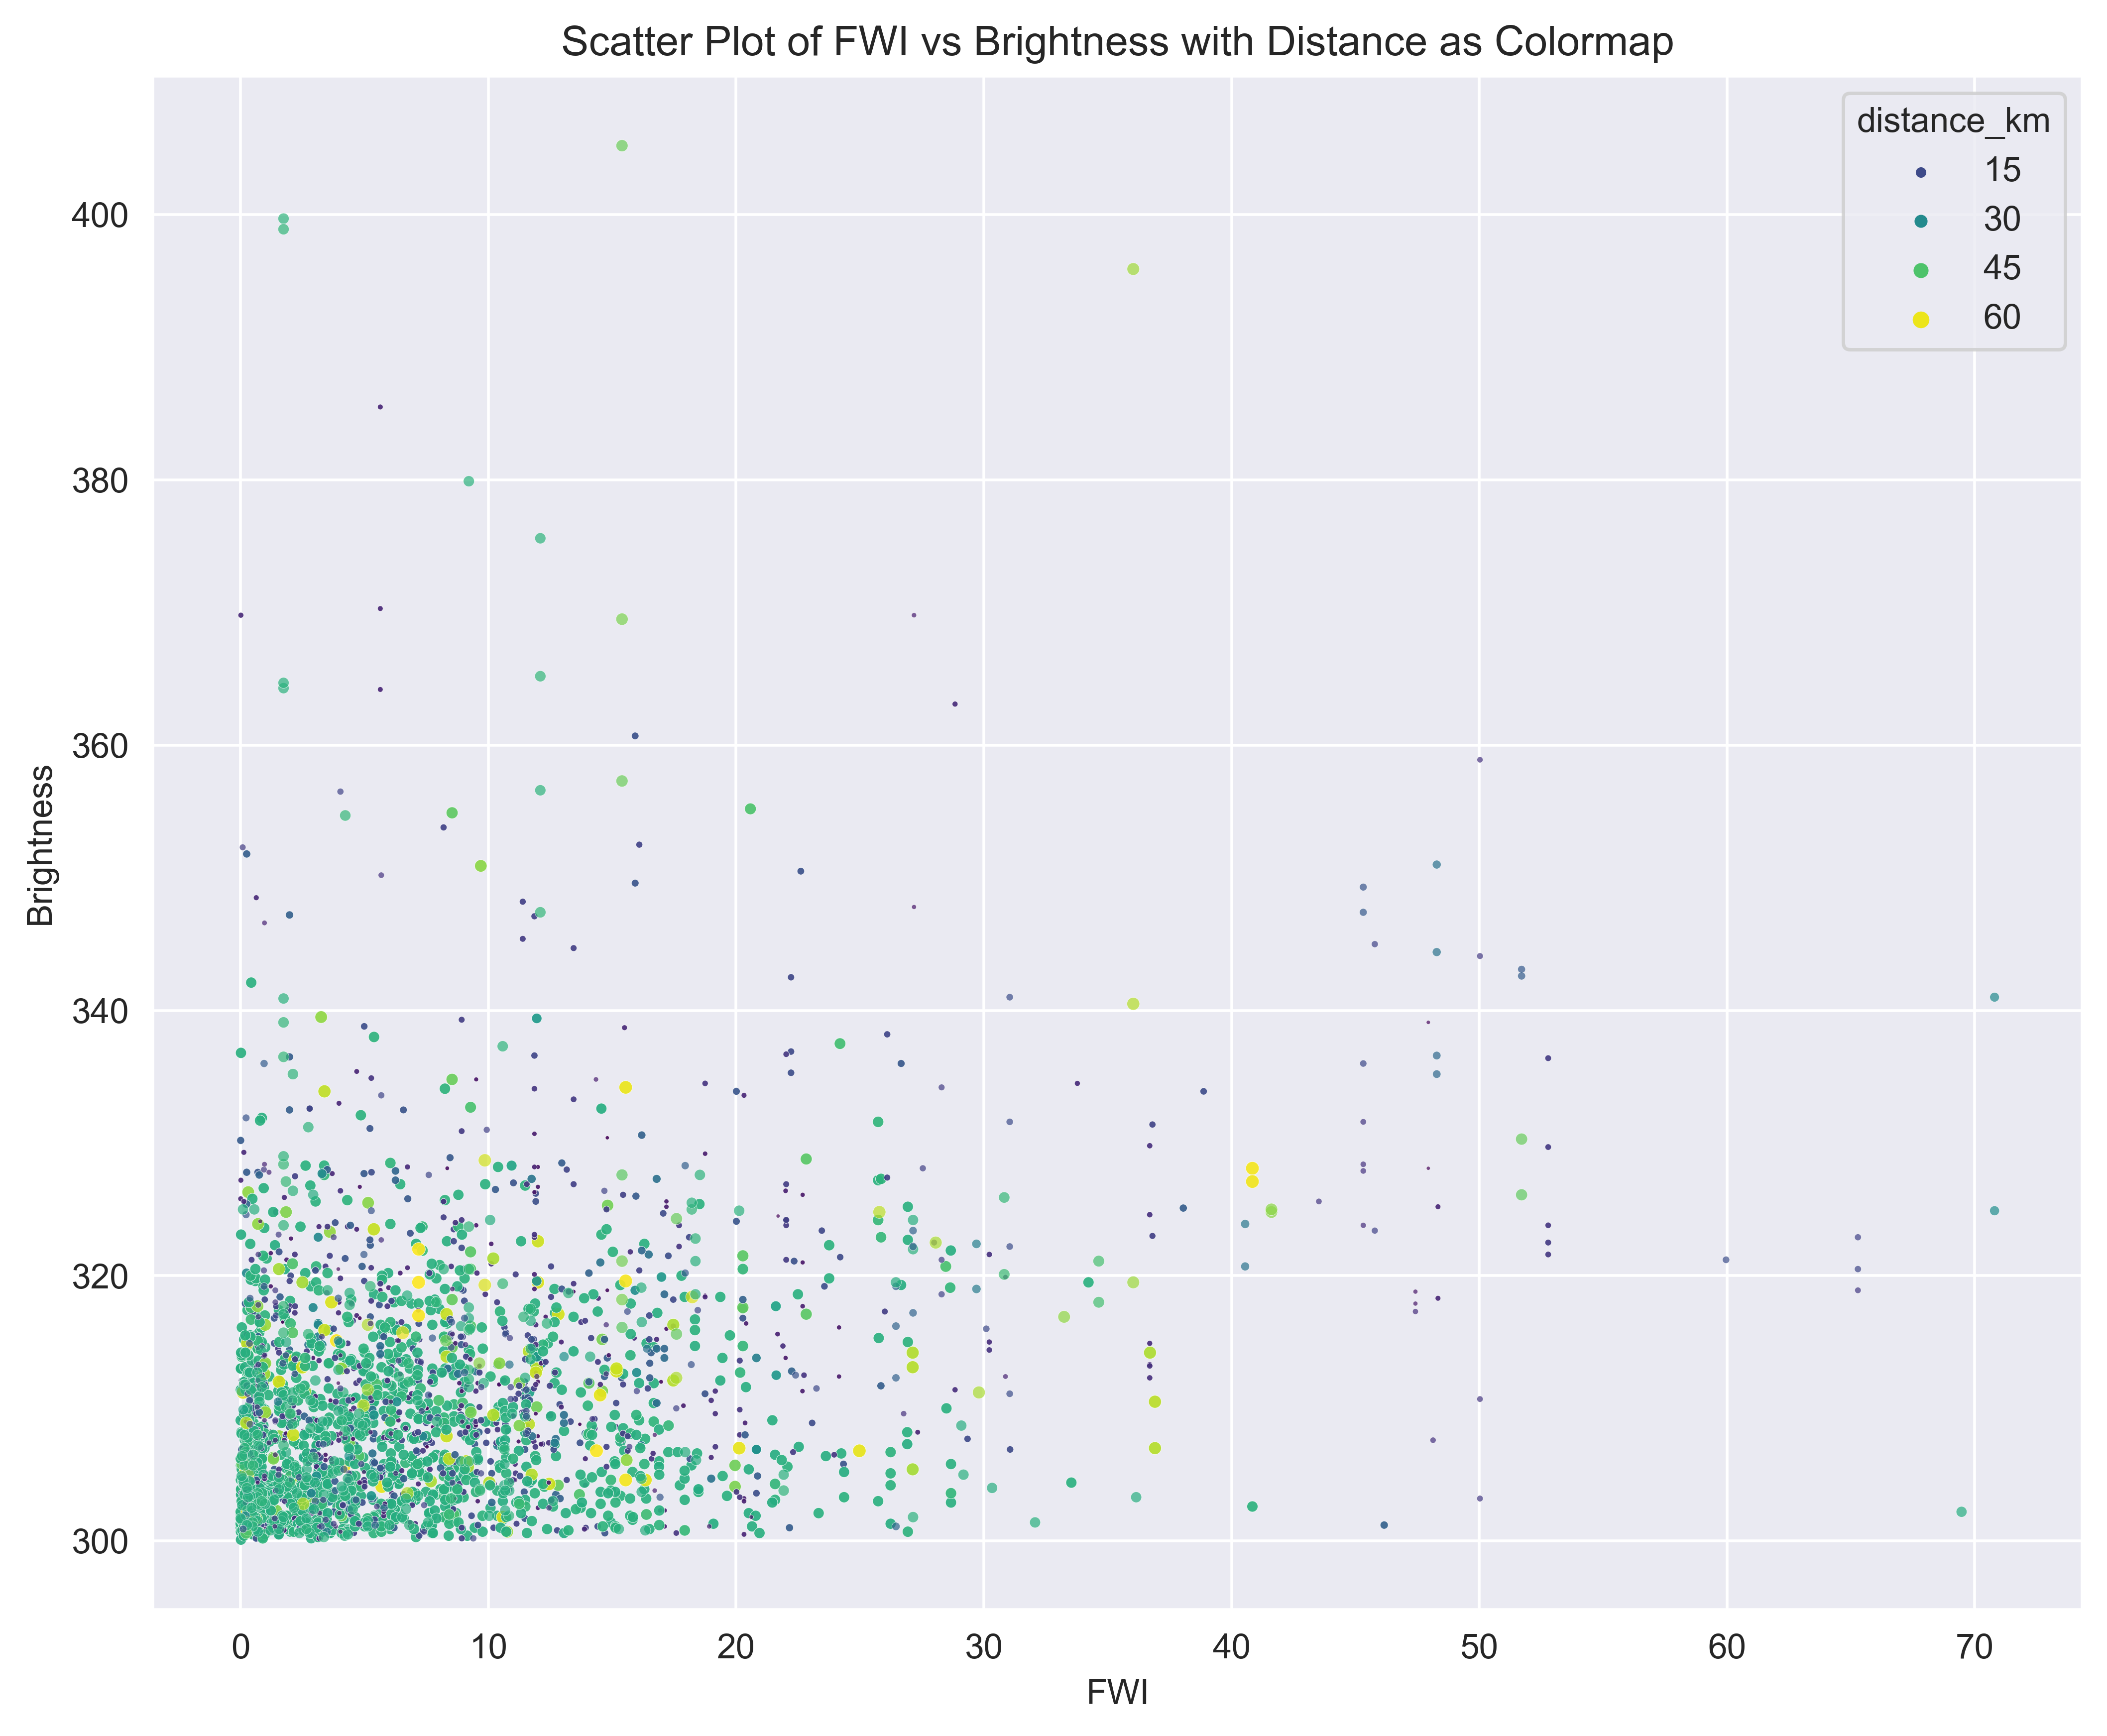

In [129]:
import seaborn as sns
# Create a scatter plot using seaborn with 'fwi' on the x-axis, 'brightness' on the y-axis, and 'distance_km' as the hue
plt.figure(figsize=(10, 8), dpi=500)
scatter = sns.scatterplot(
    data=filtered_df,
    x='fwi',
    y='brightness',
    hue='distance_km',
    palette='viridis',
    alpha=0.7,
    size='distance_km',
    sizes=(1, 15)
)
plt.xlabel('FWI')
plt.ylabel('Brightness')
plt.title('Scatter Plot of FWI vs Brightness with Distance as Colormap')
plt.show()

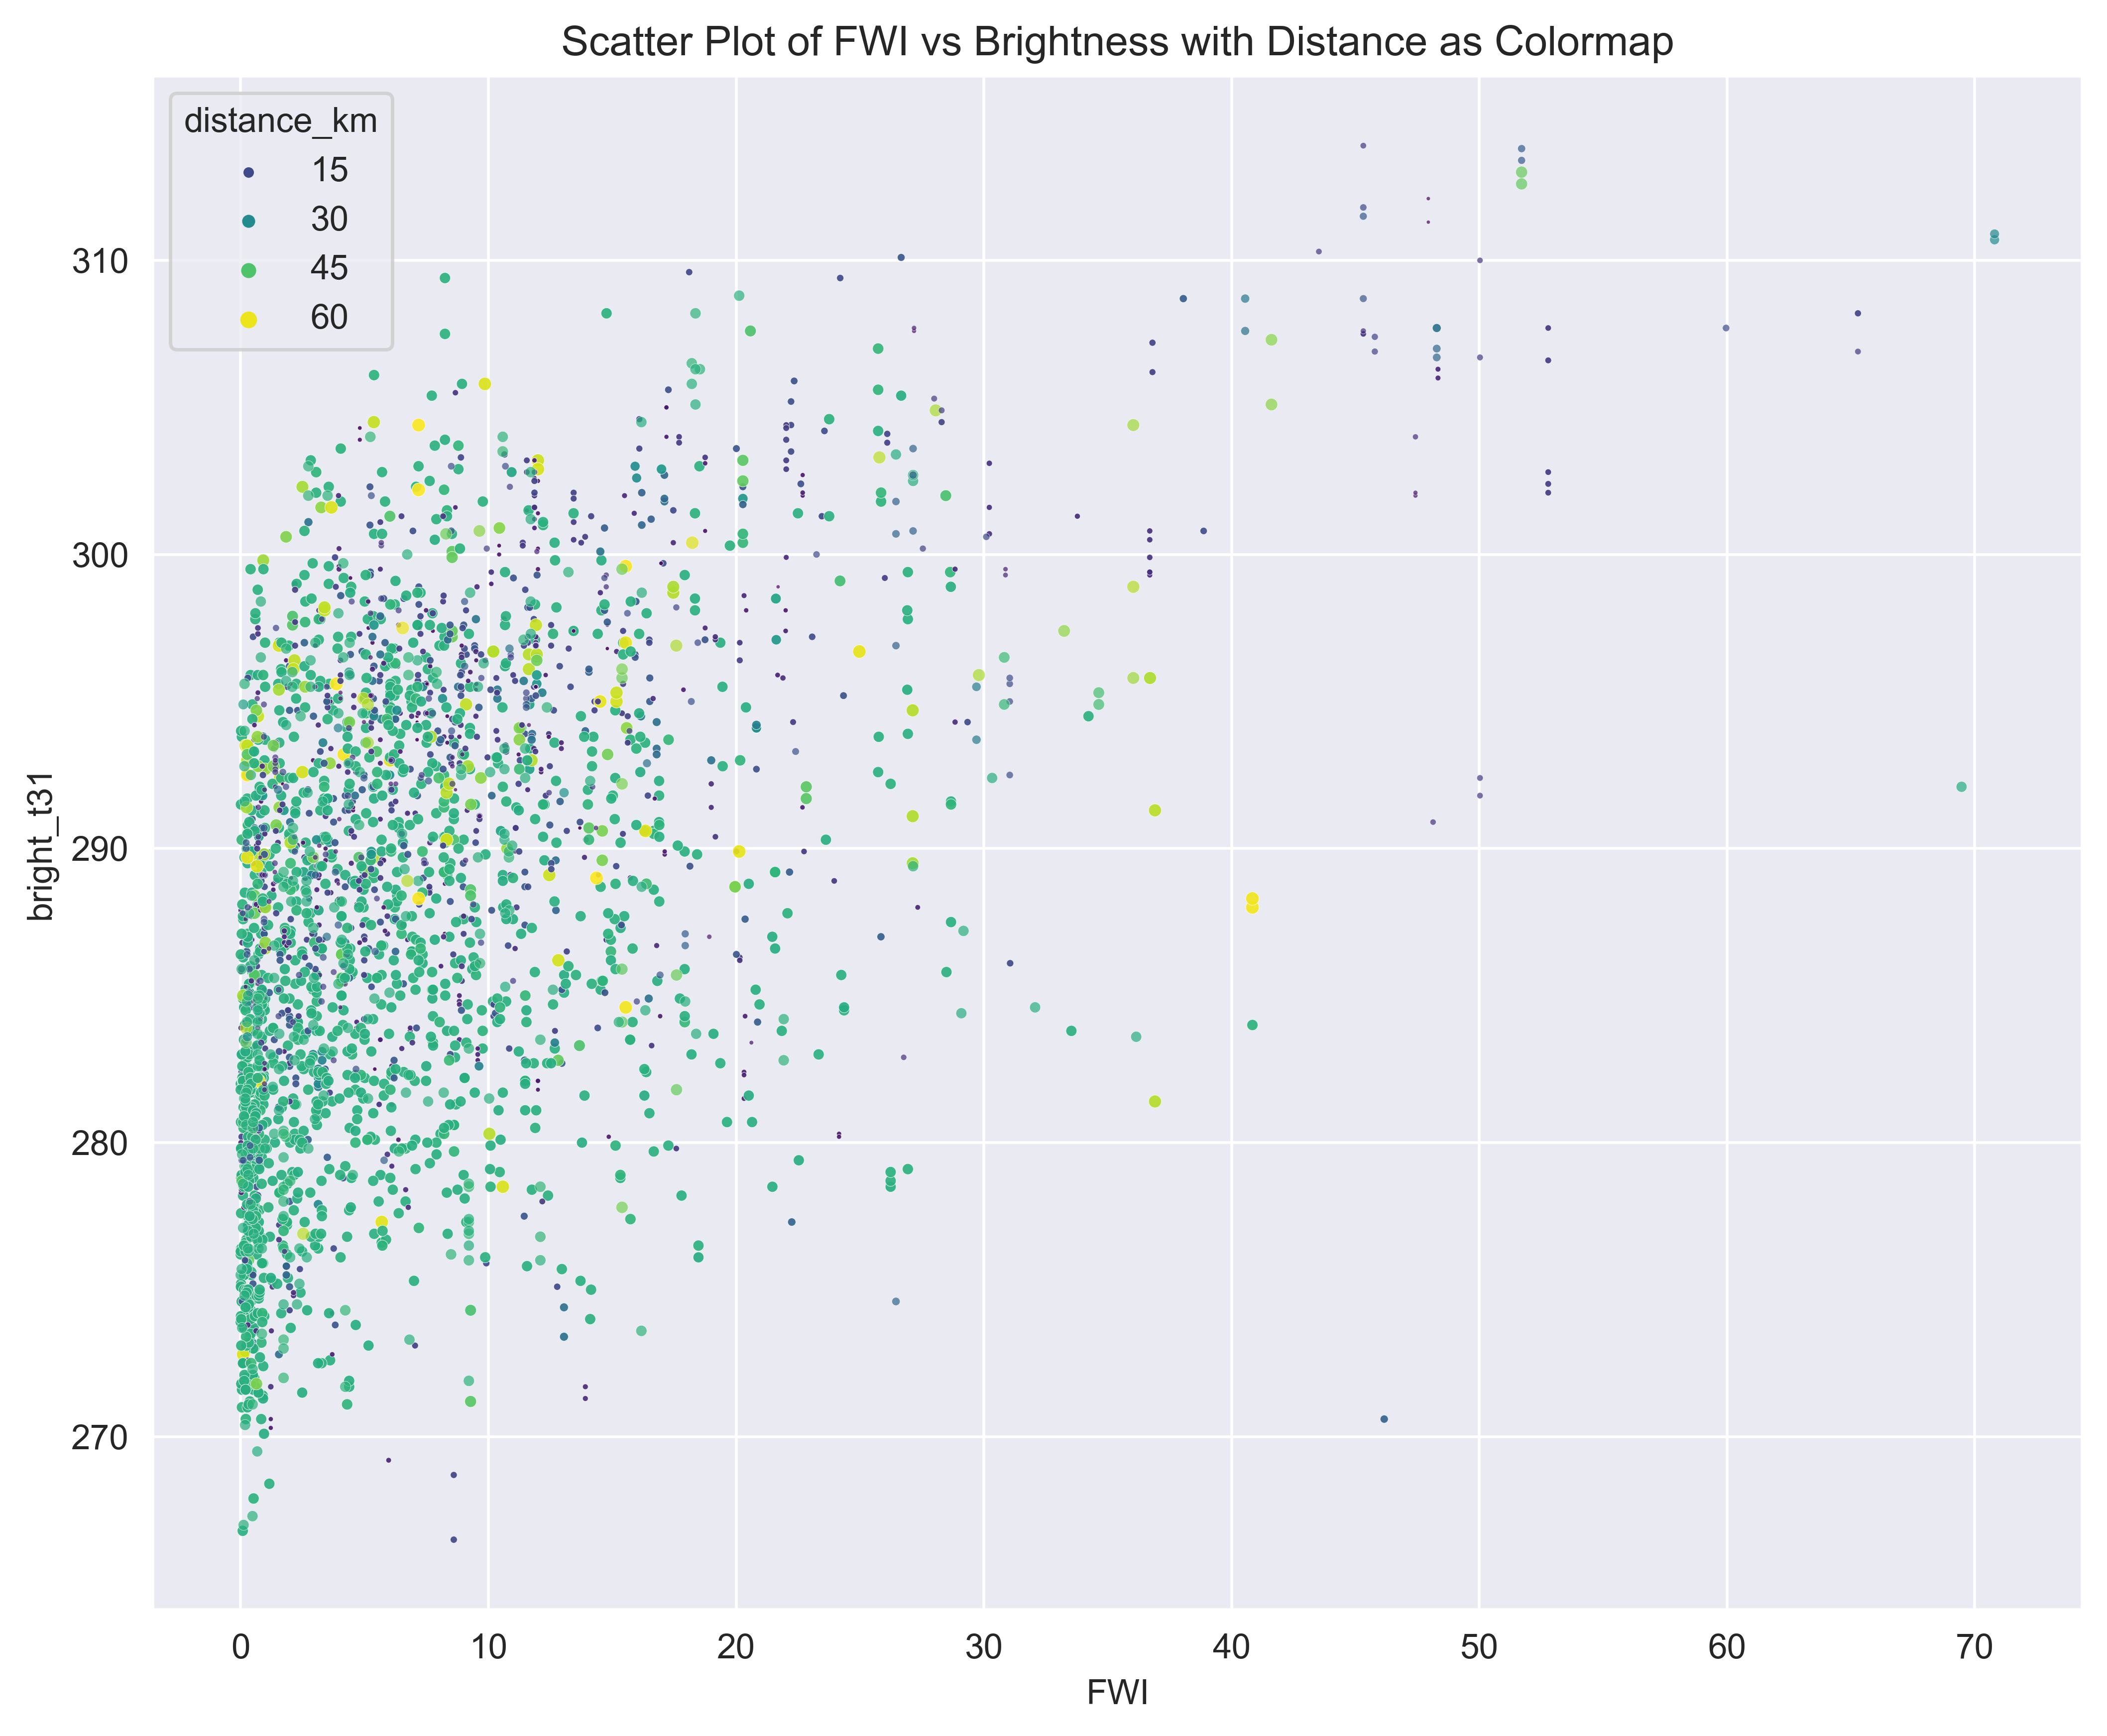

In [130]:
import seaborn as sns
# Create a scatter plot using seaborn with 'fwi' on the x-axis, 'brightness' on the y-axis, and 'distance_km' as the hue
plt.figure(figsize=(10, 8), dpi=500)
scatter = sns.scatterplot(
    data=filtered_df,
    x='fwi',
    y='bright_t31',
    hue='distance_km',
    palette='viridis',
    alpha=0.7,
    size='distance_km',
    sizes=(1, 15)
)
plt.xlabel('FWI')
plt.ylabel('bright_t31')
plt.title('Scatter Plot of FWI vs Brightness with Distance as Colormap')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of FWI vs Brightness with Distance as Marker Size')

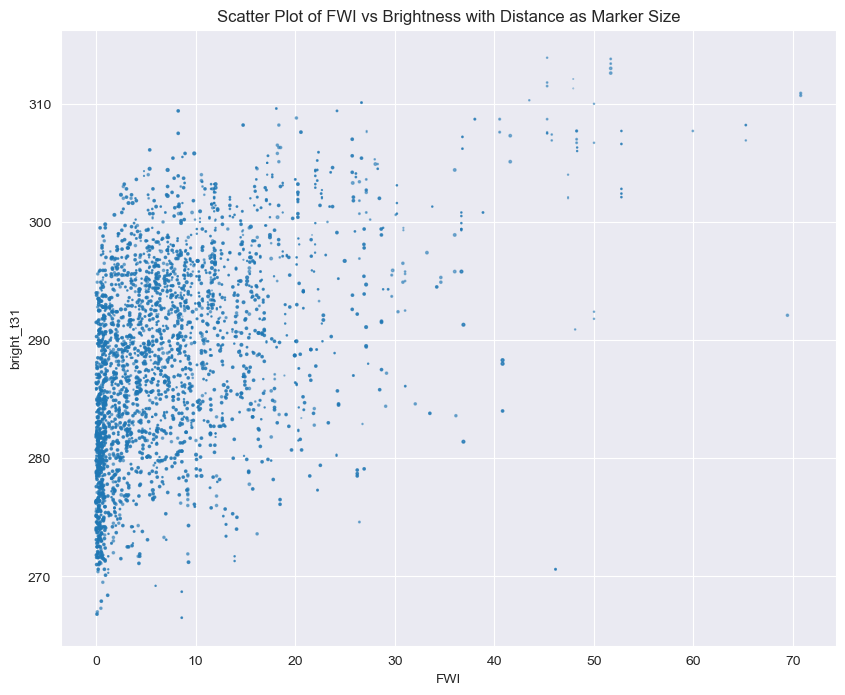

In [121]:
# Define a scaling factor to make the markers smaller
scaling_factor = 15

plt.figure(figsize=(10, 8), dpi=500)
plt.scatter(filtered_df['fwi'], filtered_df['bright_t31'], s=filtered_df['distance_km'] / scaling_factor, alpha=0.5)
plt.xlabel('FWI')
plt.ylabel('bright_t31')
plt.title('Scatter Plot of FWI vs Brightness with Distance as Marker Size')


Pearson correlation > 0.25 is considered a very strong association (Akoglu, 2018). The correlation should be higher if geolocation is considered (calculate correlation separately for different areas).

## 1.3 Calculate Pearson correlation coefficient with normalization

In [53]:
# Normalize the data using Min-Max Scaling
# x_norm = (x - x_min) / (x_max - x_min)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
filtered_df[['fwi', 'brightness']] = scaler.fit_transform(filtered_df[['fwi', 'brightness']])

In [54]:
# Calculate the correlation matrix
correlation_matrix = filtered_df[['fwi', 'brightness']].corr()

# Get the correlation between 'fwi' and 'brightness'
correlation_fwi_brightness = correlation_matrix.loc['fwi', 'brightness']

# Display the correlation
print(f"Correlation between 'fwi' and 'brightness': {correlation_fwi_brightness}")
print(correlation_matrix)

Correlation between 'fwi' and 'brightness': 0.30854754424429665
                 fwi  brightness
fwi         1.000000    0.308548
brightness  0.308548    1.000000


## 1.4 Calculate Pearson correlation coefficient for specific areas

In [84]:
filtered_df[filtered_df['date'] == '2011-01-10']

,latitude_left,longitude_left,brightness,satellite,instrument,confidence,bright_t31,frp,daynight,values,surface,latitude_right,longitude_right,fwi,distance,date,geometry,distance_km
37,53.5666,-0.5954,310.2,Aqua,MODIS,79,271.2,15.6,N,53925,0.0,53.536276,0.0,0.367188,0.596172,2011-01-10,POINT (-0.59540 53.56660),39.476924
38,53.5666,-0.5954,310.2,Aqua,MODIS,79,271.2,15.6,N,53925,0.0,53.536276,0.0,0.367188,0.596172,2011-01-10,POINT (-0.59540 53.56660),39.476924


In [93]:
import pandas as pd
year = 2012
# Ensure the 'date' column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Filter for rows in January 2020
january_2020_df = filtered_df[(filtered_df['date'] >= f'{year}-01-01') & (filtered_df['date'] < f'{year}-02-01')]

# Display the filtered dataframe
january_2020_df


,latitude_left,longitude_left,brightness,satellite,instrument,confidence,bright_t31,frp,daynight,values,surface,latitude_right,longitude_right,fwi,distance,date,geometry,distance_km
3395,53.5685,-0.5895,306.6,Terra,MODIS,60,273.7,16.8,D,53925,0.0,53.536276,0.0,0.523438,0.590380,2012-01-14,POINT (-0.58950 53.56850),39.106526
3396,53.5685,-0.5895,306.6,Terra,MODIS,60,273.7,16.8,D,53925,0.0,53.536276,0.0,0.523438,0.590380,2012-01-14,POINT (-0.58950 53.56850),39.106526
3399,53.5687,-0.5939,300.9,Aqua,MODIS,35,271.5,10.4,N,53925,0.0,53.536276,0.0,0.695312,0.594784,2012-01-15,POINT (-0.59390 53.56870),39.397909
3400,53.5687,-0.5939,300.9,Aqua,MODIS,35,271.5,10.4,N,53925,0.0,53.536276,0.0,0.695312,0.594784,2012-01-15,POINT (-0.59390 53.56870),39.397909
3407,53.5665,-0.5876,301.4,Aqua,MODIS,41,270.1,13.3,N,53925,0.0,53.536276,0.0,0.941406,0.588377,2012-01-17,POINT (-0.58760 53.56650),38.962645
3408,53.5665,-0.5876,301.4,Aqua,MODIS,41,270.1,13.3,N,53925,0.0,53.536276,0.0,0.941406,0.588377,2012-01-17,POINT (-0.58760 53.56650),38.962645
3411,53.5649,-0.5888,302.8,Terra,MODIS,51,279.8,14.7,D,53925,0.0,53.536276,0.0,6.218750,0.589495,2012-01-22,POINT (-0.58880 53.56490),39.027444
3412,53.5649,-0.5888,302.8,Terra,MODIS,51,279.8,14.7,D,53925,0.0,53.536276,0.0,6.218750,0.589495,2012-01-22,POINT (-0.58880 53.56490),39.027444
3419,53.5645,-0.5989,300.8,Terra,MODIS,42,277.0,9.0,D,53925,0.0,53.536276,0.0,0.304688,0.599565,2012-01-28,POINT (-0.59890 53.56450),39.689128
3420,53.5645,-0.5989,300.8,Terra,MODIS,42,277.0,9.0,D,53925,0.0,53.536276,0.0,0.304688,0.599565,2012-01-28,POINT (-0.59890 53.56450),39.689128


In [94]:
january_2020_df['fwi'].corr(january_2020_df['brightness'])

0.055088073616727615

In [92]:
# Calculate correlation for each month in a year
year = 2013
total_corr = 0
for month in range(1, 13):
    start_date = f'{year}-{month:02d}-01'
    if month == 12:
        end_date = f'{year+1}-01-01'
    else:
        end_date = f'{year}-{month+1:02d}-01'
    
    monthly_df = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] < end_date)]
    corr = monthly_df['fwi'].corr(monthly_df['brightness'])
    print(f"Correlation for {start_date} to {end_date}: {corr}")
    total_corr += abs(corr)
print(f"Average correlation: {total_corr / 12}")


Correlation for 2013-01-01 to 2013-02-01: nan
Correlation for 2013-02-01 to 2013-03-01: -0.5203032829196013
Correlation for 2013-03-01 to 2013-04-01: -0.513372554931127
Correlation for 2013-04-01 to 2013-05-01: -0.0011372351464300186
Correlation for 2013-05-01 to 2013-06-01: -0.2928125611621797
Correlation for 2013-06-01 to 2013-07-01: 0.4889789076158097
Correlation for 2013-07-01 to 2013-08-01: 0.39519702577058624
Correlation for 2013-08-01 to 2013-09-01: 0.05129952734707028
Correlation for 2013-09-01 to 2013-10-01: 0.19844598453917114
Correlation for 2013-10-01 to 2013-11-01: -0.09315401035538146
Correlation for 2013-11-01 to 2013-12-01: -0.4053516266793693
Correlation for 2013-12-01 to 2014-01-01: 0.11168455432042594
Average correlation: nan


C:\Users\zhong\.conda\envs\climada_env\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


# 2. Find relationship between FWI and fire intensity

## 2.1 Link FWI and brightness using multiple Functions

In Step 1, we will explore multiple functional relationships between fwi and brightness to determine the best representation. We can try linear, polynomial, logarithmic, and exponential functions. Then, we will evaluate the goodness of fit for each function using metrics like R-squared.

1. Linear Function: y = a * x + b
2. Polynomial Function (degree 2): y = a * x^2 + b * x + c
3. Polynomial Function (degree 3): y = a * x^3 + b * x^2 + c * x + d
4. Logarithmic Function: y = a * log(x) + b
5. Exponential Function: y = a * exp(b * x)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

# Define functions
def linear(x, a, b):
    return a * x + b

def polynomial2(x, a, b, c):
    return a * x**2 + b * x + c

def polynomial3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def logarithmic(x, a, b):
    return a * np.log(x) + b

def exponential(x, a, b):
    return a * np.exp(b * x)

# Prepare data
x = filtered_df['fwi']
y = filtered_df['brightness']

# Fit functions and calculate R-squared
def fit_and_evaluate(func, x, y):
    popt, pcov = curve_fit(func, x, y, maxfev=10000)
    y_pred = func(x, *popt)
    r2 = r2_score(y, y_pred)
    return popt, r2

# Linear
popt_linear, r2_linear = fit_and_evaluate(linear, x, y)

# Polynomial degree 2
popt_poly2, r2_poly2 = fit_and_evaluate(polynomial2, x, y)

# Polynomial degree 3
popt_poly3, r2_poly3 = fit_and_evaluate(polynomial3, x, y)

# Logarithmic
popt_log, r2_log = fit_and_evaluate(logarithmic, x, y)

# Exponential
popt_exp, r2_exp = fit_and_evaluate(exponential, x, y)

# Collect results
results = {
    'Linear': r2_linear,
    'Polynomial (degree 2)': r2_poly2,
    'Polynomial (degree 3)': r2_poly3,
    'Logarithmic': r2_log,
    'Exponential': r2_exp
}

In [27]:
best_function = max(results, key=results.get)
best_r2 = results[best_function]

# Print results
print(f"Best function: {best_function} with R-squared: {best_r2}")
print("All R-squared values:")

Best function: Polynomial (degree 3) with R-squared: 0.06414247453364574
All R-squared values:


In [30]:
for func, r2 in results.items():
    print(f"{func}: {r2}")

Linear: 0.06273587606119435
Polynomial (degree 2): 0.0640615835427466
Polynomial (degree 3): 0.06414247453364574
Logarithmic: 0.025626026516292866
Exponential: -576684974333301.1


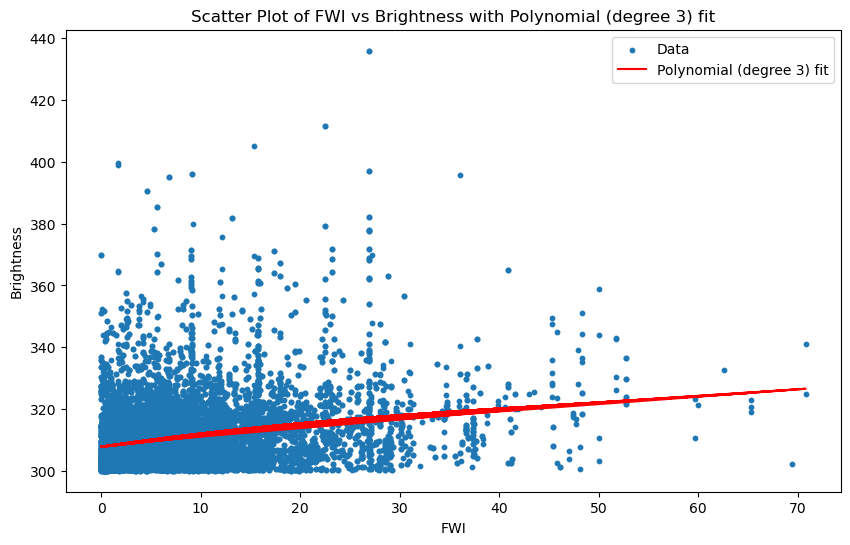

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, label='Data')

# Plot best fit line
if best_function == 'Linear':
    plt.plot(x, linear(x, *popt_linear), color='red', label='Linear fit')
elif best_function == 'Polynomial (degree 2)':
    plt.plot(x, polynomial2(x, *popt_poly2), color='red', label='Polynomial (degree 2) fit')
elif best_function == 'Polynomial (degree 3)':
    plt.plot(x, polynomial3(x, *popt_poly3), color='red', label='Polynomial (degree 3) fit')
elif best_function == 'Logarithmic':
    plt.plot(x, logarithmic(x, *popt_log), color='red', label='Logarithmic fit')
elif best_function == 'Exponential':
    plt.plot(x, exponential(x, *popt_exp), color='red', label='Exponential fit')

plt.xlabel('FWI')
plt.ylabel('Brightness')
plt.title(f'Scatter Plot of FWI vs Brightness with {best_function} fit')
plt.legend()
plt.show()




## 2.2 Use Statistical Methods

In [19]:
# Calculate the correlation coefficient
correlation = filtered_df['fwi'].corr(filtered_df['brightness'])
print(f"Correlation coefficient between 'fwi' and 'brightness': {correlation}")

In [32]:
import statsmodels.api as sm
# Perform a regression analysis using statsmodels
X = sm.add_constant(filtered_df['fwi'])  # Add a constant term for the intercept
y = filtered_df['brightness']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the regression analysis summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             brightness   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     928.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.68e-197
Time:                        18:56:31   Log-Likelihood:                -52667.
No. Observations:               13877   AIC:                         1.053e+05
Df Residuals:                   13875   BIC:                         1.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.2260      0.130   2372.021      0.0

In [33]:
# Print the R-squared value explicitly
print(f"R-squared: {model.rsquared}")

R-squared: 0.06273587606119424


R-squared: 0.063 - This indicates that approximately 6.3% of the variability in brightness can be explained by fwi.

Prob (F-statistic): 1.68e-197 - This is the p-value for the F-statistic. A value close to zero (much less than 0.05) indicates that the model is statistically significant.


The regression model shows that there is a statistically significant relationship between fwi and brightness, with both the intercept and the slope being highly significant (p < 0.05). However, the R-squared value of 0.063 indicates that fwi explains only about 6.3% of the variability in brightness, suggesting that other factors may also influence brightness. 

## 2.3 Use Machine Learning Methods

In [19]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# 
# # Split the data into training and testing sets
# X = filtered_df[['fwi']]
# y = filtered_df['brightness']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# # Initialize and train the model
# model = LinearRegression()
# model.fit(X_train, y_train)
# 
# # Make predictions
# y_pred = model.predict(X_test)
# 
# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# 
# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")


# 3. Include WFI into overall (global) propagation probability (self.ProbaParams.prop_proba=0.21)

A simple thought:
Step1: Calculate the average FWI
Step2: For each centriod, calculate the percentage deviation of FWI from the average FWI
Step3: Use the percentage deviation * 0.21 to adjust the overall propagation probability
Step4: Consider geographical location using kNN or other methods...